# SENTIMENT ANALYSIST ON 1ST PHOTO EXHIBITION JAEMIN NARCISSISM

Congratulations on the success of the first photo exhibition from Na Jaemin. The event will be held for 1 month starting from June 29, 2024 to July 31, 2024. To see how fans respond, this sentiment analysis project was created. The dataset was taken from twitter with the keyword Narcissism jaemin.

## Importing Necessary Libraries

In [4]:
import pandas as pd
import html
import pandas as pd
from googletrans import Translator

## Loading Dataset 

In [5]:
df = pd.read_csv(r'Data\narcissism_dataset.csv')
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.800000e+18,Fri Jun 14 06:00:09 +0000 2024,20853,&lt; NARCISSISM : JAEMIN 1st PHOTO EXHIBITION ...,1.800000e+18,https://pbs.twimg.com/media/GQAx-8IaQAEokgq.jpg,NaN,ko,NaN,355,475,13150,https://x.com/NCTsmtown/status/180149481786990...,4.811011e+09,NCTsmtown
1,1.800000e+18,Fri Jun 14 01:44:55 +0000 2024,46197,#NCT #재민 첫 개인 사진전 #NARCISSISM 6월 29일오픈! 사진 작가로...,1.800000e+18,https://pbs.twimg.com/media/GP_3kPybUAA65sV.jpg,NaN,ko,NaN,3011,1600,27395,https://x.com/NCTsmtown/status/180143058501101...,4.811011e+09,NCTsmtown
2,1.800000e+18,Thu Jun 13 06:19:50 +0000 2024,1670,NARCISSISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EX...,1.800000e+18,https://pbs.twimg.com/media/GP7s51absAAf4tq.jpg,NaN,en,재민 제노 잼젠,57,0,1023,https://x.com/jamong1323/status/18011373840522...,1.420000e+18,jamong1323
3,1.800000e+18,Mon Jun 17 15:25:10 +0000 2024,4855,Jaemin got casted while volunteering and till ...,1.800000e+18,https://pbs.twimg.com/media/GQSQEzcboAA6NhK.jpg,NaN,en,akgae,109,8,2423,https://x.com/user13082000_/status/18027241739...,1.470000e+18,user13082000_
4,1.800000e+18,Thu Jun 13 10:38:04 +0000 2024,288,️ Mini Support Project for &lt; NARCISSISM @NA...,1.800000e+18,https://pbs.twimg.com/media/GP8oAUPbwAAoYNu.jpg,NaN,ko,🐰 항상 재민이 옆에 🐱,32,1,255,https://x.com/najaeminnesia/status/18012023710...,1.340000e+18,najaeminnesia


# Initial Data Analysis

### Dataset Overview 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      1139 non-null   float64
 1   created_at               1139 non-null   object 
 2   favorite_count           1139 non-null   int64  
 3   full_text                1139 non-null   object 
 4   id_str                   1139 non-null   float64
 5   image_url                1030 non-null   object 
 6   in_reply_to_screen_name  68 non-null     object 
 7   lang                     1139 non-null   object 
 8   location                 782 non-null    object 
 9   quote_count              1139 non-null   int64  
 10  reply_count              1139 non-null   int64  
 11  retweet_count            1139 non-null   int64  
 12  tweet_url                1139 non-null   object 
 13  user_id_str              1139 non-null   float64
 14  username                

### Handling Missing Values 

In [7]:
df.isnull().sum()

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     0
id_str                        0
image_url                   109
in_reply_to_screen_name    1071
lang                          0
location                    357
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username                      0
dtype: int64

In [8]:
df.drop(df.columns[[5,6,8]],axis=1, inplace=True)

In [9]:
df.isnull().sum()

conversation_id_str    0
created_at             0
favorite_count         0
full_text              0
id_str                 0
lang                   0
quote_count            0
reply_count            0
retweet_count          0
tweet_url              0
user_id_str            0
username               0
dtype: int64

### Handling Duplicates 

In [10]:
df.drop_duplicates()

,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.800000e+18,Fri Jun 14 06:00:09 +0000 2024,20853,&lt; NARCISSISM : JAEMIN 1st PHOTO EXHIBITION ...,1.800000e+18,ko,355,475,13150,https://x.com/NCTsmtown/status/180149481786990...,4.811011e+09,NCTsmtown
1,1.800000e+18,Fri Jun 14 01:44:55 +0000 2024,46197,#NCT #재민 첫 개인 사진전 #NARCISSISM 6월 29일오픈! 사진 작가로...,1.800000e+18,ko,3011,1600,27395,https://x.com/NCTsmtown/status/180143058501101...,4.811011e+09,NCTsmtown
2,1.800000e+18,Thu Jun 13 06:19:50 +0000 2024,1670,NARCISSISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EX...,1.800000e+18,en,57,0,1023,https://x.com/jamong1323/status/18011373840522...,1.420000e+18,jamong1323
3,1.800000e+18,Mon Jun 17 15:25:10 +0000 2024,4855,Jaemin got casted while volunteering and till ...,1.800000e+18,en,109,8,2423,https://x.com/user13082000_/status/18027241739...,1.470000e+18,user13082000_
4,1.800000e+18,Thu Jun 13 10:38:04 +0000 2024,288,️ Mini Support Project for &lt; NARCISSISM @NA...,1.800000e+18,ko,32,1,255,https://x.com/najaeminnesia/status/18012023710...,1.340000e+18,najaeminnesia
...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1.814830e+18,Sun Jul 21 01:07:42 +0000 2024,6,DAY 23 ‼️ JAEMIN PHOTOGRAPHER DEBUT #JAEMIN_NA...,1.814830e+18,en,0,11,0,https://x.com/nayaka_nana/status/1814829570379...,1.700840e+18,nayaka_nana
1135,1.814820e+18,Sun Jul 21 00:40:49 +0000 2024,0,&gt; day-23 with 𝐍𝐀𝐑𝐂𝐈𝐒𝐒𝐈𝐒𝐌 PHOTOGRAPHER JAEMI...,1.814820e+18,en,0,7,0,https://x.com/nanarisjae/status/18148228052441...,1.600080e+18,nanarisjae
1136,1.814830e+18,Sun Jul 21 00:54:23 +0000 2024,0,D23 when in London PHOTOGRAPHER JAEMIN #JAEMIN...,1.814830e+18,en,0,0,0,https://x.com/0614day/status/1814826221064364535,2.161853e+09,0614day
1137,1.814810e+18,Sun Jul 21 00:00:23 +0000 2024,0,우리는 4센터가 트위터(x)와 웨이보 등의 플랫폼에서 재민이가 SnackPaper...,1.814810e+18,ko,0,0,0,https://x.com/marinatedchick_/status/181481262...,1.483280e+18,marinatedchick_


In [11]:
df = df.drop_duplicates(subset=['full_text'])

### Handling Unnecessary Words 

In [12]:
# Kata-kata yang ingin dihapus
kata_dihapus = ['po', 'pre order', 'md', 'wtb', 'want to buy', 'iso', 'open']

# Fungsi lambda untuk menghapus kata
def hapus_kata(text):
  for kata in kata_dihapus:
    text = text.replace(kata, '')
  return text

# Hapus kata-kata menggunakan lambda
df['full_text'] = df['full_text'].apply(hapus_kata)

# Cetak hasil
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.800000e+18,Fri Jun 14 06:00:09 +0000 2024,20853,&lt; NARCISSISM : JAEMIN 1st PHOTO EXHIBITION ...,1.800000e+18,ko,355,475,13150,https://x.com/NCTsmtown/status/180149481786990...,4.811011e+09,NCTsmtown
1,1.800000e+18,Fri Jun 14 01:44:55 +0000 2024,46197,#NCT #재민 첫 개인 사진전 #NARCISSISM 6월 29일오픈! 사진 작가로...,1.800000e+18,ko,3011,1600,27395,https://x.com/NCTsmtown/status/180143058501101...,4.811011e+09,NCTsmtown
2,1.800000e+18,Thu Jun 13 06:19:50 +0000 2024,1670,NARCISSISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EX...,1.800000e+18,en,57,0,1023,https://x.com/jamong1323/status/18011373840522...,1.420000e+18,jamong1323
3,1.800000e+18,Mon Jun 17 15:25:10 +0000 2024,4855,Jaemin got casted while volunteering and till ...,1.800000e+18,en,109,8,2423,https://x.com/user13082000_/status/18027241739...,1.470000e+18,user13082000_
4,1.800000e+18,Thu Jun 13 10:38:04 +0000 2024,288,️ Mini Suprt Project for &lt; NARCISSISM @NA_R...,1.800000e+18,ko,32,1,255,https://x.com/najaeminnesia/status/18012023710...,1.340000e+18,najaeminnesia
...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1.814830e+18,Sun Jul 21 01:07:42 +0000 2024,6,DAY 23 ‼️ JAEMIN PHOTOGRAPHER DEBUT #JAEMIN_NA...,1.814830e+18,en,0,11,0,https://x.com/nayaka_nana/status/1814829570379...,1.700840e+18,nayaka_nana
1135,1.814820e+18,Sun Jul 21 00:40:49 +0000 2024,0,&gt; day-23 with 𝐍𝐀𝐑𝐂𝐈𝐒𝐒𝐈𝐒𝐌 PHOTOGRAPHER JAEMI...,1.814820e+18,en,0,7,0,https://x.com/nanarisjae/status/18148228052441...,1.600080e+18,nanarisjae
1136,1.814830e+18,Sun Jul 21 00:54:23 +0000 2024,0,D23 when in London PHOTOGRAPHER JAEMIN #JAEMIN...,1.814830e+18,en,0,0,0,https://x.com/0614day/status/1814826221064364535,2.161853e+09,0614day
1137,1.814810e+18,Sun Jul 21 00:00:23 +0000 2024,0,우리는 4센터가 트위터(x)와 웨이보 등의 플랫폼에서 재민이가 SnackPaper...,1.814810e+18,ko,0,0,0,https://x.com/marinatedchick_/status/181481262...,1.483280e+18,marinatedchick_


### Handling Unnecessary Pattern and Character 

In [14]:
# Decode HTML entities
df['full_text'] = df['full_text'].apply(html.unescape)

# Pola regex untuk menghilangkan URL, retweet, hashtag, dan tag
patterns = [
    r'https?://\S+',  # URL
    r'RT\s@\w+',      # Retweet
    r'#\S+',          # Hashtag
    r'@\S+',          # Tag
]

# Menghilangkan pola dari 'full_text' dan menambahkan spasi setelah penghapusan
for pattern in patterns:
    df['full_text'] = df['full_text'].str.replace(pattern, ' ', regex=True)

# Pola regex untuk menghilangkan karakter khusus dengan menggantinya dengan spasi
special_chars_pattern = r'[!?:;<>!!-._,()x⋆｡˚⋆⁠ө⭐️️.◜◡◝ꔛ𖦹/ᐢ⑅ᐢ꒰˶༝˶꒱./づ~⑅˚₊̷ ⃣ع˖⁺≽^ɞ̴̶̷ ̫ ɞ̴̶̷^≼⋆ㅠㅡㅠ=ᵕ=𝄃𝄃𝄂𝄂𝄀𝄁𝄃𝄂𝄂𝄃]'

# Menghilangkan karakter khusus dan menggantinya dengan spasi
df['full_text'] = df['full_text'].str.replace(special_chars_pattern, ' ', regex=True)

# Menghapus spasi kosong yang berlebih dan mengganti beberapa spasi dengan satu spasi
df['full_text'] = df['full_text'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Menampilkan hasilnya
print(df['full_text'])

0       NARCISSISM JAEMIN 1st PHOTO EXHIBITION OPEN 29...
1       첫 개인 사진전 6월 29일오픈 사진 작가로 데뷔 재민의 독창적인 감성으로 팬들과 ...
2       NARCISSISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EX...
3       Jaemin got casted while volunteering and till ...
4       Mini Suprt Project for NARCISSISM JAEMIN 1st P...
                              ...                        
1134                   DAY 23 ‼ JAEMIN PHOTOGRAPHER DEBUT
1135    day 23 with 𝐍𝐀𝐑𝐂𝐈𝐒𝐒𝐈𝐒𝐌 PHOTOGRAPHER JAEMIN 1ST...
1136               D23 when in London PHOTOGRAPHER JAEMIN
1137    우리는 4센터가 트위터 와 웨이보 등의 플랫폼에서 재민이가 SnackPaper의 B...
1138                                  PHOTOGRAPHER JAEMIN
Name: full_text, Length: 1134, dtype: object


### Translating Column Target 

In [15]:
def translate_text(text, target_language='en'):
    translator = Translator()
    try:
        translation = translator.translate(text, dest=target_language).text
    except Exception as e:
        print(f"Error translating: {e}")
        translation = text  # Or handle errors as needed
    return translation

In [16]:
# Assuming a column named 'text' contains the text to be translated
df['translated_text'] = df['full_text'].apply(translate_text)

In [19]:
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,translated_text
0,1.800000e+18,Fri Jun 14 06:00:09 +0000 2024,20853,NARCISSISM JAEMIN 1st PHOTO EXHIBITION OPEN 29...,1.800000e+18,ko,355,475,13150,https://x.com/NCTsmtown/status/180149481786990...,4.811011e+09,NCTsmtown,NARCISSISM JAEMIN 1st PHOTO EXHIBITION OPEN 29...
1,1.800000e+18,Fri Jun 14 01:44:55 +0000 2024,46197,첫 개인 사진전 6월 29일오픈 사진 작가로 데뷔 재민의 독창적인 감성으로 팬들과 ...,1.800000e+18,ko,3011,1600,27395,https://x.com/NCTsmtown/status/180143058501101...,4.811011e+09,NCTsmtown,First solo photo exhibition opens on June 29 D...
2,1.800000e+18,Thu Jun 13 06:19:50 +0000 2024,1670,NARCISSISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EX...,1.800000e+18,en,57,0,1023,https://x.com/jamong1323/status/18011373840522...,1.420000e+18,jamong1323,NARCISSISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EX...
3,1.800000e+18,Mon Jun 17 15:25:10 +0000 2024,4855,Jaemin got casted while volunteering and till ...,1.800000e+18,en,109,8,2423,https://x.com/user13082000_/status/18027241739...,1.470000e+18,user13082000_,Jaemin got casted while volunteering and till ...
4,1.800000e+18,Thu Jun 13 10:38:04 +0000 2024,288,Mini Suprt Project for NARCISSISM JAEMIN 1st P...,1.800000e+18,ko,32,1,255,https://x.com/najaeminnesia/status/18012023710...,1.340000e+18,najaeminnesia,Mini Suprt Project for NARCISSISM JAEMIN 1st P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1.814830e+18,Sun Jul 21 01:07:42 +0000 2024,6,DAY 23 ‼ JAEMIN PHOTOGRAPHER DEBUT,1.814830e+18,en,0,11,0,https://x.com/nayaka_nana/status/1814829570379...,1.700840e+18,nayaka_nana,DAY 23 ‼ JAEMIN PHOTOGRAPHER DEBUT
1135,1.814820e+18,Sun Jul 21 00:40:49 +0000 2024,0,day 23 with 𝐍𝐀𝐑𝐂𝐈𝐒𝐒𝐈𝐒𝐌 PHOTOGRAPHER JAEMIN 1ST...,1.814820e+18,en,0,7,0,https://x.com/nanarisjae/status/18148228052441...,1.600080e+18,nanarisjae,day 23 with 𝐍𝐀𝐑𝐂𝐈𝐒𝐒𝐈𝐒𝐌 PHOTOGRAPHER JAEMIN 1ST...
1136,1.814830e+18,Sun Jul 21 00:54:23 +0000 2024,0,D23 when in London PHOTOGRAPHER JAEMIN,1.814830e+18,en,0,0,0,https://x.com/0614day/status/1814826221064364535,2.161853e+09,0614day,D23 when in London PHOTOGRAPHER JAEMIN
1137,1.814810e+18,Sun Jul 21 00:00:23 +0000 2024,0,우리는 4센터가 트위터 와 웨이보 등의 플랫폼에서 재민이가 SnackPaper의 B...,1.814810e+18,ko,0,0,0,https://x.com/marinatedchick_/status/181481262...,1.483280e+18,marinatedchick_,We hope that 4Center will sufficiently promote...


In [18]:
df.to_csv('Data/data_clean.csv')

## Labeling Sentiment 

to label sentiment data, the Label Studio tool is used. Labeling is done manually and tries to be as careful as possible in determining which label the data is included in.

## Importing Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import re
import joblib
import pickle
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from transformers import BertTokenizer
from wordcloud import WordCloud
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMRINA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AMRINA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading Dataset 

In [2]:
df_clean = pd.read_csv('Data/data_clean.csv')
df_clean

,ID,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,translated_text,sentiment
0,0,1.800000e+18,Fri Jun 14 06:00:09 +0000 2024,20853,NARCISSISM JAEMIN 1st PHOTO EXHIBITION OPEN 29...,1.800000e+18,ko,355,475,13150,https://x.com/NCTsmtown/status/180149481786990...,4.811011e+09,NCTsmtown,NARCISSISM JAEMIN 1st PHOTO EXHIBITION OPEN 29...,Neutral
1,1,1.800000e+18,Fri Jun 14 01:44:55 +0000 2024,46197,첫 개인 사진전 6월 29일오픈 사진 작가로 데뷔 재민의 독창적인 감성으로 팬들과 ...,1.800000e+18,ko,3011,1600,27395,https://x.com/NCTsmtown/status/180143058501101...,4.811011e+09,NCTsmtown,First solo photo exhibition opens on June 29 D...,Positive
2,2,1.800000e+18,Thu Jun 13 06:19:50 +0000 2024,1670,NARCISSISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EX...,1.800000e+18,en,57,0,1023,https://x.com/jamong1323/status/18011373840522...,1.420000e+18,jamong1323,NARCISSISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EX...,Neutral
3,3,1.800000e+18,Mon Jun 17 15:25:10 +0000 2024,4855,Jaemin got casted while volunteering and till ...,1.800000e+18,en,109,8,2423,https://x.com/user13082000_/status/18027241739...,1.470000e+18,user13082000_,Jaemin got casted while volunteering and till ...,Positive
4,4,1.800000e+18,Thu Jun 13 10:38:04 +0000 2024,288,Mini Support Project for NARCISSISM JAEMIN 1st...,1.800000e+18,ko,32,1,255,https://x.com/najaeminnesia/status/18012023710...,1.340000e+18,najaeminnesia,Mini Support Project for NARCISSISM JAEMIN 1st...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,1261,1.820000e+18,Tue Jul 30 00:04:09 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/user13082000_/status/18180750710...,1.470000e+18,user13082000_,NARCISSISM BY NA JAEMIN,Neutral
1234,1262,1.820000e+18,Tue Jul 30 00:04:20 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/Sailorneww/status/18180751175175...,4.739379e+08,Sailorneww,NARCISSISM BY NA JAEMIN,Neutral
1235,1263,1.820000e+18,Tue Jul 30 00:00:10 +0000 2024,0,D 32 NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/jlynrj/status/1818074066542272684,1.430000e+18,jlynrj,D 32 NARCISSISM BY NA JAEMIN,Neutral
1236,1264,1.820000e+18,Tue Jul 30 00:04:13 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/ffrongg_/status/1818075085485523352,1.260000e+18,ffrongg_,NARCISSISM BY NA JAEMIN,Neutral


## Data Preprocessing 

In [3]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [4]:
def remove_emojis(text):
    if isinstance(text, str):  # Check if it's a string
        for emoji in emojis:
            text = text.replace(emoji, '')
            return text

In [5]:
df_clean['translated_text'] = df_clean['translated_text'].apply(remove_emojis)

In [6]:
def clean_text(df, column_name):
    df[column_name] = df[column_name].fillna('').astype(str).str.replace(r'(.)\1', r'\1', regex=True)
    df[column_name] = df[column_name].str.replace(r'[^a-zA-Z0-9]', ' ', regex=True)  # Apply non-alphanumeric replacement
    return df

In [7]:
df_clean = clean_text(df_clean.copy(), 'translated_text')

In [8]:
df_clean

,ID,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,translated_text,sentiment
0,0,1.800000e+18,Fri Jun 14 06:00:09 +0000 2024,20853,NARCISSISM JAEMIN 1st PHOTO EXHIBITION OPEN 29...,1.800000e+18,ko,355,475,13150,https://x.com/NCTsmtown/status/180149481786990...,4.811011e+09,NCTsmtown,NARCISISM JAEMIN 1st PHOTO EXHIBITION OPEN 29 ...,Neutral
1,1,1.800000e+18,Fri Jun 14 01:44:55 +0000 2024,46197,첫 개인 사진전 6월 29일오픈 사진 작가로 데뷔 재민의 독창적인 감성으로 팬들과 ...,1.800000e+18,ko,3011,1600,27395,https://x.com/NCTsmtown/status/180143058501101...,4.811011e+09,NCTsmtown,First solo photo exhibition opens on June 29 D...,Positive
2,2,1.800000e+18,Thu Jun 13 06:19:50 +0000 2024,1670,NARCISSISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EX...,1.800000e+18,en,57,0,1023,https://x.com/jamong1323/status/18011373840522...,1.420000e+18,jamong1323,NARCISISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EXH...,Neutral
3,3,1.800000e+18,Mon Jun 17 15:25:10 +0000 2024,4855,Jaemin got casted while volunteering and till ...,1.800000e+18,en,109,8,2423,https://x.com/user13082000_/status/18027241739...,1.470000e+18,user13082000_,Jaemin got casted while voluntering and til th...,Positive
4,4,1.800000e+18,Thu Jun 13 10:38:04 +0000 2024,288,Mini Support Project for NARCISSISM JAEMIN 1st...,1.800000e+18,ko,32,1,255,https://x.com/najaeminnesia/status/18012023710...,1.340000e+18,najaeminnesia,Mini Suport Project for NARCISISM JAEMIN 1st P...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,1261,1.820000e+18,Tue Jul 30 00:04:09 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/user13082000_/status/18180750710...,1.470000e+18,user13082000_,NARCISISM BY NA JAEMIN,Neutral
1234,1262,1.820000e+18,Tue Jul 30 00:04:20 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/Sailorneww/status/18180751175175...,4.739379e+08,Sailorneww,NARCISISM BY NA JAEMIN,Neutral
1235,1263,1.820000e+18,Tue Jul 30 00:00:10 +0000 2024,0,D 32 NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/jlynrj/status/1818074066542272684,1.430000e+18,jlynrj,D 32 NARCISISM BY NA JAEMIN,Neutral
1236,1264,1.820000e+18,Tue Jul 30 00:04:13 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/ffrongg_/status/1818075085485523352,1.260000e+18,ffrongg_,NARCISISM BY NA JAEMIN,Neutral


In [9]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Tokenization
    words = text.split()
    
#     # Stopwords removal
#     stop_words = set(stopwords.words('english'))  # Ganti 'english' dengan bahasa yang sesuai
#     words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back to text
    text = ' '.join(words)
    
    return text

In [10]:
df_clean['text'] = df_clean['translated_text'].apply(preprocess_text)

In [11]:
# Replacing short words
df_clean['text'] = df_clean['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [12]:
# # Kata-kata yang ingin dihapus
# kata_dihapus = ['po', 'pre order', 'md', 'wtb', 'want to buy', 'iso', 'open', 'pre', 'shiping', 'ver', 'mention', 'tag', 'day', 'd23', 'freebies']

# # Fungsi lambda untuk menghapus kata
# def hapus_kata(text):
#     for kata in kata_dihapus:
#         text = text.replace(kata, '')
#     return text

# # Hapus kata-kata menggunakan lambda
# df_clean['text'] = df_clean['text'].apply(hapus_kata)

In [13]:
df_clean

,ID,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,translated_text,sentiment,text
0,0,1.800000e+18,Fri Jun 14 06:00:09 +0000 2024,20853,NARCISSISM JAEMIN 1st PHOTO EXHIBITION OPEN 29...,1.800000e+18,ko,355,475,13150,https://x.com/NCTsmtown/status/180149481786990...,4.811011e+09,NCTsmtown,NARCISISM JAEMIN 1st PHOTO EXHIBITION OPEN 29 ...,Neutral,narcisism jaemin 1st photo exhibition open jun...
1,1,1.800000e+18,Fri Jun 14 01:44:55 +0000 2024,46197,첫 개인 사진전 6월 29일오픈 사진 작가로 데뷔 재민의 독창적인 감성으로 팬들과 ...,1.800000e+18,ko,3011,1600,27395,https://x.com/NCTsmtown/status/180143058501101...,4.811011e+09,NCTsmtown,First solo photo exhibition opens on June 29 D...,Positive,first solo photo exhibition open june debut ph...
2,2,1.800000e+18,Thu Jun 13 06:19:50 +0000 2024,1670,NARCISSISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EX...,1.800000e+18,en,57,0,1023,https://x.com/jamong1323/status/18011373840522...,1.420000e+18,jamong1323,NARCISISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EXH...,Neutral,narcisism photographer jaemin 1st photo exhibi...
3,3,1.800000e+18,Mon Jun 17 15:25:10 +0000 2024,4855,Jaemin got casted while volunteering and till ...,1.800000e+18,en,109,8,2423,https://x.com/user13082000_/status/18027241739...,1.470000e+18,user13082000_,Jaemin got casted while voluntering and til th...,Positive,jaemin got casted while voluntering and til th...
4,4,1.800000e+18,Thu Jun 13 10:38:04 +0000 2024,288,Mini Support Project for NARCISSISM JAEMIN 1st...,1.800000e+18,ko,32,1,255,https://x.com/najaeminnesia/status/18012023710...,1.340000e+18,najaeminnesia,Mini Suport Project for NARCISISM JAEMIN 1st P...,Positive,mini suport project for narcisism jaemin 1st p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,1261,1.820000e+18,Tue Jul 30 00:04:09 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/user13082000_/status/18180750710...,1.470000e+18,user13082000_,NARCISISM BY NA JAEMIN,Neutral,narcisism jaemin
1234,1262,1.820000e+18,Tue Jul 30 00:04:20 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/Sailorneww/status/18180751175175...,4.739379e+08,Sailorneww,NARCISISM BY NA JAEMIN,Neutral,narcisism jaemin
1235,1263,1.820000e+18,Tue Jul 30 00:00:10 +0000 2024,0,D 32 NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/jlynrj/status/1818074066542272684,1.430000e+18,jlynrj,D 32 NARCISISM BY NA JAEMIN,Neutral,narcisism jaemin
1236,1264,1.820000e+18,Tue Jul 30 00:04:13 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/ffrongg_/status/1818075085485523352,1.260000e+18,ffrongg_,NARCISISM BY NA JAEMIN,Neutral,narcisism jaemin


## Wordcloud 

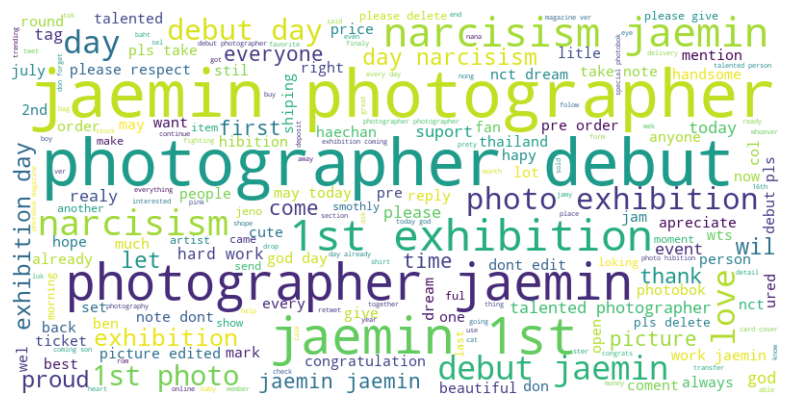

In [14]:
text = " ".join(df_clean['text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Getting Sentiment Label Using Textblob 

In [15]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity < -0.2:
        return 'negative'
    elif polarity > 0.2:
        return 'positive'
    else:
        return 'neutral'

df_clean['sentiment_text'] = df_clean['text'].apply(get_sentiment)
df_clean

,ID,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,translated_text,sentiment,text,sentiment_text
0,0,1.800000e+18,Fri Jun 14 06:00:09 +0000 2024,20853,NARCISSISM JAEMIN 1st PHOTO EXHIBITION OPEN 29...,1.800000e+18,ko,355,475,13150,https://x.com/NCTsmtown/status/180149481786990...,4.811011e+09,NCTsmtown,NARCISISM JAEMIN 1st PHOTO EXHIBITION OPEN 29 ...,Neutral,narcisism jaemin 1st photo exhibition open jun...,neutral
1,1,1.800000e+18,Fri Jun 14 01:44:55 +0000 2024,46197,첫 개인 사진전 6월 29일오픈 사진 작가로 데뷔 재민의 독창적인 감성으로 팬들과 ...,1.800000e+18,ko,3011,1600,27395,https://x.com/NCTsmtown/status/180143058501101...,4.811011e+09,NCTsmtown,First solo photo exhibition opens on June 29 D...,Positive,first solo photo exhibition open june debut ph...,positive
2,2,1.800000e+18,Thu Jun 13 06:19:50 +0000 2024,1670,NARCISSISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EX...,1.800000e+18,en,57,0,1023,https://x.com/jamong1323/status/18011373840522...,1.420000e+18,jamong1323,NARCISISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EXH...,Neutral,narcisism photographer jaemin 1st photo exhibi...,neutral
3,3,1.800000e+18,Mon Jun 17 15:25:10 +0000 2024,4855,Jaemin got casted while volunteering and till ...,1.800000e+18,en,109,8,2423,https://x.com/user13082000_/status/18027241739...,1.470000e+18,user13082000_,Jaemin got casted while voluntering and til th...,Positive,jaemin got casted while voluntering and til th...,positive
4,4,1.800000e+18,Thu Jun 13 10:38:04 +0000 2024,288,Mini Support Project for NARCISSISM JAEMIN 1st...,1.800000e+18,ko,32,1,255,https://x.com/najaeminnesia/status/18012023710...,1.340000e+18,najaeminnesia,Mini Suport Project for NARCISISM JAEMIN 1st P...,Positive,mini suport project for narcisism jaemin 1st p...,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,1261,1.820000e+18,Tue Jul 30 00:04:09 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/user13082000_/status/18180750710...,1.470000e+18,user13082000_,NARCISISM BY NA JAEMIN,Neutral,narcisism jaemin,neutral
1234,1262,1.820000e+18,Tue Jul 30 00:04:20 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/Sailorneww/status/18180751175175...,4.739379e+08,Sailorneww,NARCISISM BY NA JAEMIN,Neutral,narcisism jaemin,neutral
1235,1263,1.820000e+18,Tue Jul 30 00:00:10 +0000 2024,0,D 32 NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/jlynrj/status/1818074066542272684,1.430000e+18,jlynrj,D 32 NARCISISM BY NA JAEMIN,Neutral,narcisism jaemin,neutral
1236,1264,1.820000e+18,Tue Jul 30 00:04:13 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,https://x.com/ffrongg_/status/1818075085485523352,1.260000e+18,ffrongg_,NARCISISM BY NA JAEMIN,Neutral,narcisism jaemin,neutral


### Comparison Between Manual Sentiment Label And Textblob Sentiment Label 

In [16]:
# Menampilkan beberapa data sample untuk memastikan konsistensi label
print(df_clean[['sentiment', 'sentiment_text']].head(10))

# Memastikan label konsisten dengan mengonversi semua ke format lower case atau title case
df_clean['sentiment'] = df_clean['sentiment'].str.lower()
df_clean['sentiment_text'] = df_clean['sentiment_text'].str.lower()

# Membandingkan kedua kolom
df_clean['comparison'] = df_clean['sentiment'] == df_clean['sentiment_text']

# Menghitung akurasi
accuracy = df_clean['comparison'].mean()

print(f'Akurasi: {accuracy * 100:.2f}%')

# Menampilkan data yang tidak cocok untuk analisis lebih lanjut
mismatch = df_clean[df_clean['comparison'] == False]
print(mismatch[['sentiment', 'sentiment_text']])

  sentiment sentiment_text
0   Neutral        neutral
1  Positive       positive
2   Neutral        neutral
3  Positive       positive
4  Positive        neutral
5  Positive       positive
6  Positive       positive
7   Neutral        neutral
8   Neutral        neutral
9   Neutral        neutral
Akurasi: 45.96%
     sentiment sentiment_text
4     positive        neutral
13    positive        neutral
16    positive        neutral
18    positive        neutral
21    positive        neutral
...        ...            ...
1225  positive        neutral
1227  positive        neutral
1228  positive        neutral
1229  positive       negative
1237  positive        neutral

[669 rows x 2 columns]


### Counting The Number of Each Label Sentiment On Manual Sentiment Label 

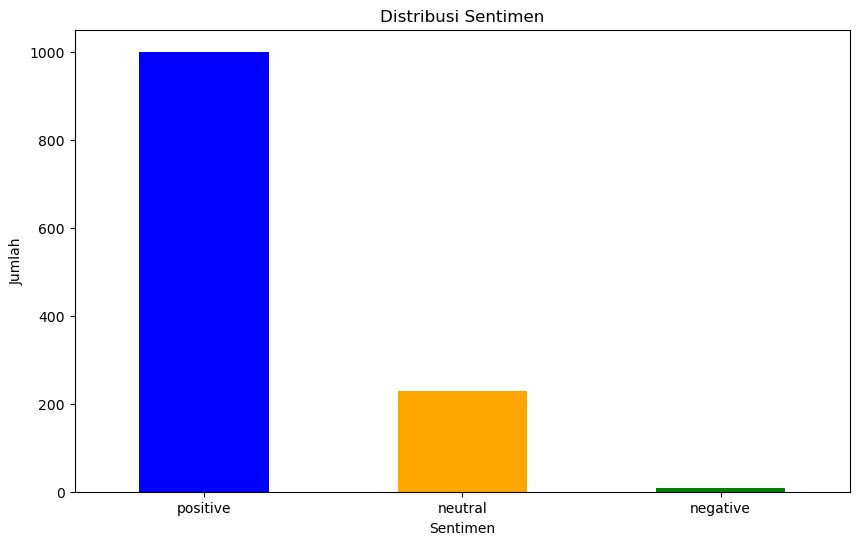

In [17]:
# Menghitung jumlah masing-masing nilai di kolom 'sentiment'
sentiment_counts = df_clean['sentiment'].value_counts()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

### Counting The Number of Each Label Sentiment On Textblob Sentiment Label 

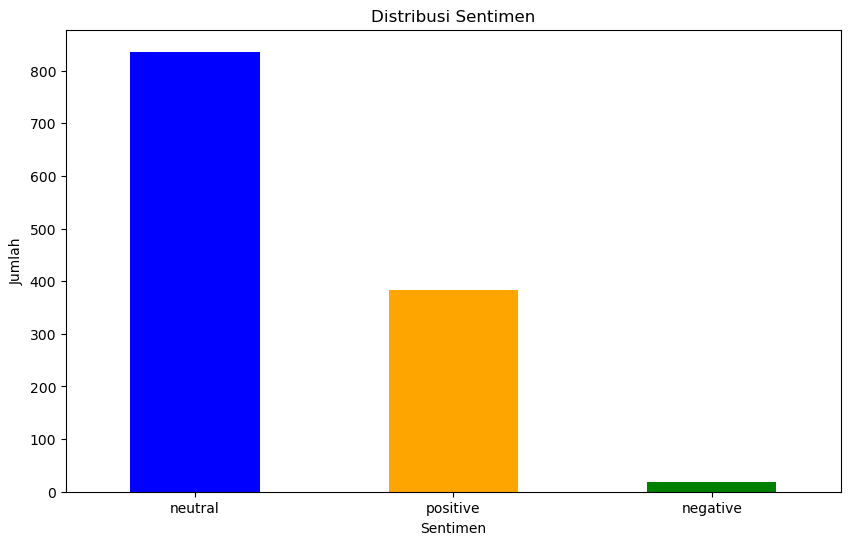

In [18]:
# Menghitung jumlah masing-masing nilai di kolom 'sentiment'
sentiment_counts = df_clean['sentiment_text'].value_counts()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

### Using Vader Analyzer

In [19]:
analyzer = SentimentIntensityAnalyzer()

df_clean['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df_clean['text']]
df_clean['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df_clean['text']]
df_clean['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df_clean['text']]
df_clean['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df_clean['text']]

df_clean

,ID,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,quote_count,reply_count,retweet_count,...,username,translated_text,sentiment,text,sentiment_text,comparison,compound,neg,neu,pos
0,0,1.800000e+18,Fri Jun 14 06:00:09 +0000 2024,20853,NARCISSISM JAEMIN 1st PHOTO EXHIBITION OPEN 29...,1.800000e+18,ko,355,475,13150,...,NCTsmtown,NARCISISM JAEMIN 1st PHOTO EXHIBITION OPEN 29 ...,neutral,narcisism jaemin 1st photo exhibition open jun...,neutral,True,0.0000,0.0,1.000,0.000
1,1,1.800000e+18,Fri Jun 14 01:44:55 +0000 2024,46197,첫 개인 사진전 6월 29일오픈 사진 작가로 데뷔 재민의 독창적인 감성으로 팬들과 ...,1.800000e+18,ko,3011,1600,27395,...,NCTsmtown,First solo photo exhibition opens on June 29 D...,positive,first solo photo exhibition open june debut ph...,positive,True,0.3182,0.0,0.913,0.087
2,2,1.800000e+18,Thu Jun 13 06:19:50 +0000 2024,1670,NARCISSISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EX...,1.800000e+18,en,57,0,1023,...,jamong1323,NARCISISM PHOTOGRAPHER NA JAEMIN 1st PHOTO EXH...,neutral,narcisism photographer jaemin 1st photo exhibi...,neutral,True,0.0000,0.0,1.000,0.000
3,3,1.800000e+18,Mon Jun 17 15:25:10 +0000 2024,4855,Jaemin got casted while volunteering and till ...,1.800000e+18,en,109,8,2423,...,user13082000_,Jaemin got casted while voluntering and til th...,positive,jaemin got casted while voluntering and til th...,positive,True,0.6369,0.0,0.802,0.198
4,4,1.800000e+18,Thu Jun 13 10:38:04 +0000 2024,288,Mini Support Project for NARCISSISM JAEMIN 1st...,1.800000e+18,ko,32,1,255,...,najaeminnesia,Mini Suport Project for NARCISISM JAEMIN 1st P...,positive,mini suport project for narcisism jaemin 1st p...,neutral,False,0.0000,0.0,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,1261,1.820000e+18,Tue Jul 30 00:04:09 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,...,user13082000_,NARCISISM BY NA JAEMIN,neutral,narcisism jaemin,neutral,True,0.0000,0.0,1.000,0.000
1234,1262,1.820000e+18,Tue Jul 30 00:04:20 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,...,Sailorneww,NARCISISM BY NA JAEMIN,neutral,narcisism jaemin,neutral,True,0.0000,0.0,1.000,0.000
1235,1263,1.820000e+18,Tue Jul 30 00:00:10 +0000 2024,0,D 32 NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,...,jlynrj,D 32 NARCISISM BY NA JAEMIN,neutral,narcisism jaemin,neutral,True,0.0000,0.0,1.000,0.000
1236,1264,1.820000e+18,Tue Jul 30 00:04:13 +0000 2024,0,NARCISSISM BY NA JAEMIN,1.820000e+18,tl,0,0,0,...,ffrongg_,NARCISISM BY NA JAEMIN,neutral,narcisism jaemin,neutral,True,0.0000,0.0,1.000,0.000


The compound score is a metric that calculates the sum of all the ratings which have been normalized between -1 (most extreme negative) and +1 (most extreme positive).

- positive sentiment : compound score greater than 0.05
- neutral sentiment : compound score between -0.05 and 0.05
- negative sentiment : compound score less than -0.05

Let's examine the distribution of sentiment.

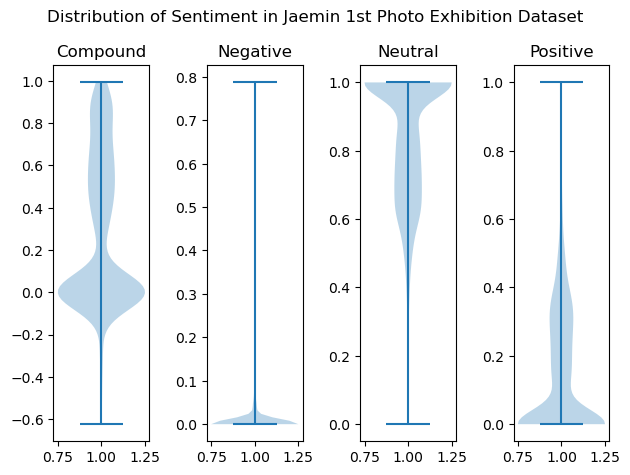

In [20]:
# Extract Figure and Axes instance
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4)

# Create plots showing distribution
ax1.violinplot(df_clean.compound)
ax1.set_title('Compound')

ax2.violinplot(df_clean.neg)
ax2.set_title('Negative')

ax3.violinplot(df_clean.neu)
ax3.set_title('Neutral')

ax4.violinplot(df_clean.pos)
ax4.set_title('Positive')

# Display settings
fig.suptitle('Distribution of Sentiment in Jaemin 1st Photo Exhibition Dataset')
fig.tight_layout()
plt.show()

### Bag Of Word 

In [21]:
bow_vectorizer = CountVectorizer()
bow_features = bow_vectorizer.fit_transform(df_clean['text'])

### TF-IDF 

In [22]:
# Term Frequency-Inverse Document Frequency (TF-IDF) Model
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df_clean['text'])

### Word2Vec 

In [23]:
# Assuming df_clean['text'] contains the cleaned text data
word2vec_model = Word2Vec(sentences=[word_tokenize(text) for text in df_clean['text']], vector_size=100, window=5, min_count=1, workers=4)

def get_word_vector(word):
    if word in word2vec_model.wv:
        return word2vec_model.wv[word]
    else:
        return np.zeros(100)  # Return zero vector if word not found

word2vec_features = []
for text in df_clean['text']:
    word_vectors = [get_word_vector(word) for word in word_tokenize(text)]
    if word_vectors:  # Check if the list is not empty
        word2vec_features.append(np.mean(word_vectors, axis=0))
    else:
        word2vec_features.append(np.zeros(100))  # Handle empty tokenized lists

word2vec_features = np.array(word2vec_features)

In [24]:
y = df_clean.sentiment.values

## Logistic Regression 

### Logistic Regression Using Bow 

In [25]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow_features, y, test_size = 0.20, random_state = 0)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lr_model.predict(X_test)

f1_score_lr = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (Logistic Regression):", f1_score_lr)

F1 Score (Logistic Regression): 0.8565117201332817


### Logistic Regression Using Tf-idf

In [26]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, y, test_size = 0.20, random_state = 0)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lr_model.predict(X_test)

f1_score_lr = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (Logistic Regression):", f1_score_lr)

F1 Score (Logistic Regression): 0.8370569544757129


### Logistic Regression Using Word2Vec 

In [27]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(word2vec_features, y, test_size = 0.20, random_state = 0)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lr_model.predict(X_test)

f1_score_lr = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (Logistic Regression):", f1_score_lr)

F1 Score (Logistic Regression): 0.7425064230659435


## SVM 

### SVM using kernel linear 

In [28]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test)
f1_score_svm = f1_score(y_test, y_pred_svm,average='weighted')
print("F1 Score (SVM):", f1_score_svm)

F1 Score (SVM): 0.7425064230659435


### SVM using kernel rbf

In [29]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test)
f1_score_svm = f1_score(y_test, y_pred_svm,average='weighted')
print("F1 Score (SVM):", f1_score_svm)

F1 Score (SVM): 0.7425064230659435


### SVM using kernel sigmoid 

In [30]:
svm_model = SVC(kernel='sigmoid')
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test)
f1_score_svm = f1_score(y_test, y_pred_svm,average='weighted')
print("F1 Score (SVM):", f1_score_svm)

F1 Score (SVM): 0.7425064230659435


### SVM using kernel poly 

In [31]:
svm_model = SVC(kernel='poly', degree = 10)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test)
f1_score_svm = f1_score(y_test, y_pred_svm,average='weighted')
print("F1 Score (SVM):", f1_score_svm)

F1 Score (SVM): 0.7786486420237279


## Naive Bayes 

### GaussianNB 

In [32]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred_gaus = classifier.predict(X_test)
f1_score_gaus = f1_score(y_test, y_pred_gaus,average='weighted')
print("F1 Score (GaussianNB):", f1_score_gaus)

F1 Score (GaussianNB): 0.745043718958151


## Neural Network 

In [33]:
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(bow_features, y, test_size=0.20, random_state=42)

# # Convert sparse matrices to dense
# X_train_dense = X_train.toarray()
# X_test_dense = X_test.toarray()

# # Example label mapping for multi-class classification
# label_mapping = {
#     'positive': 2,
#     'neutral': 1,
#     'negative': 0
# }

# # Assuming y_train and y_test are numpy arrays with sentiment labels
# y_train_series = pd.Series(y_train)
# y_test_series = pd.Series(y_test)

# # Map the sentiment labels to numeric values
# y_train_mapped = y_train_series.map(label_mapping)
# y_test_mapped = y_test_series.map(label_mapping)

# # Convert the mapped Series back to numpy arrays
# y_train_mapped = np.array(y_train_mapped, dtype=np.int32)
# y_test_mapped = np.array(y_test_mapped, dtype=np.int32)

# # One-hot encode the labels
# y_train_onehot = to_categorical(y_train_mapped, num_classes=3)
# y_test_onehot = to_categorical(y_test_mapped, num_classes=3)

# # Ensure feature matrices are in float format
# X_train_dense = np.array(X_train_dense, dtype=np.float32)
# X_test_dense = np.array(X_test_dense, dtype=np.float32)

# # Define a simple neural network model for multi-class classification
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# model = Sequential()
# model.add(Dense(128, input_dim=X_train_dense.shape[1], activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(3, activation='softmax'))  # 3 output classes

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(X_train_dense, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test_dense, y_test_onehot))

In [44]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Preprocess text data (tokenization, padding)
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(df_clean['text'])
sequences = tokenizer.texts_to_sequences(df_clean['text'])
padded_sequences = pad_sequences(sequences, maxlen=100)  # Adjust maxlen as needed

# Convert labels to numerical format
label_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
labels = df_clean['sentiment'].map(label_mapping)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Define the LSTM model
model = Sequential()
model.add(Embedding(10000, 64, input_length=100))  # Adjust embedding dimensions as needed
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


Epoch 1/10
31/31 [==============================] - 4s 58ms/step - loss: 0.6981 - accuracy: 0.7949 - val_loss: 0.4640 - val_accuracy: 0.8226
Epoch 2/10
31/31 [==============================] - 1s 39ms/step - loss: 0.4749 - accuracy: 0.8040 - val_loss: 0.3860 - val_accuracy: 0.8226
Epoch 3/10
31/31 [==============================] - 1s 38ms/step - loss: 0.3794 - accuracy: 0.8404 - val_loss: 0.2650 - val_accuracy: 0.9073
Epoch 4/10
31/31 [==============================] - 1s 39ms/step - loss: 0.2676 - accuracy: 0.9101 - val_loss: 0.2308 - val_accuracy: 0.8790
Epoch 5/10
31/31 [==============================] - 1s 41ms/step - loss: 0.2160 - accuracy: 0.9273 - val_loss: 0.1998 - val_accuracy: 0.9234
Epoch 6/10
31/31 [==============================] - 1s 39ms/step - loss: 0.1776 - accuracy: 0.9404 - val_loss: 0.1956 - val_accuracy: 0.9234
Epoch 7/10
31/31 [==============================] - 1s 37ms/step - loss: 0.1539 - accuracy: 0.9444 - val_loss: 0.2190 - val_accuracy: 0.9153
Epoch 8/10
31

In [45]:
# # Evaluate the model using F1-Score
# y_pred = model.predict(X_test_dense)

# # Get the class with the highest probability
# y_pred_class = np.argmax(y_pred, axis=1)

# # Compute the F1-Score
# f1 = f1_score(y_test_mapped, y_pred_class, average='weighted')
# print("F1-Score:", f1)


# Assuming your model predicts probabilities
y_pred = model.predict(X_test)

# Threshold for converting probabilities to class labels (adjust as needed)
threshold = 0.5

# Convert probabilities to binary labels (0 or 1)
y_pred_class = (y_pred > threshold).astype(int)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_class, average='weighted')  # Adjust average as needed
print("F1-Score:", f1)


8/8 [==============================] - 1s 11ms/step
F1-Score: 0.9121676181707727


In [46]:
# Memanggil metode build untuk membuat bobot model
model.build(input_shape=(None, 100))

# Menyimpan model ke file
model.save('sentiment_model.h5')

C:\Users\AMRINA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
# Misalkan tokenizer sudah dibuat dan dipakai untuk pelatihan model
tokenizer = Tokenizer()  # Ganti dengan tokenizer Anda yang telah digunakan

# Menyimpan tokenizer ke file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [48]:
# Memuat model dari file
model = load_model('sentiment_model.h5')

# Memuat tokenizer dari file
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Panjang urutan input yang digunakan saat melatih model
max_sequence_length = 100  # Sesuaikan dengan panjang urutan yang digunakan saat pelatihan

# Fungsi untuk memprediksi sentimen dari beberapa teks
def predict_sentiments(texts):
    # Preprocessing input texts
    texts_seq = tokenizer.texts_to_sequences(texts)
    texts_pad = pad_sequences(texts_seq, maxlen=max_sequence_length)
    
    # Model prediction
    y_pred = model.predict(texts_pad)
    
    # Get the class with the highest probability
    y_pred_class = np.argmax(y_pred, axis=1)
    
    # Interpret the results
    sentiment_labels = {0: 'negative', 1: 'neutral', 2: 'positive'}  # Sesuaikan dengan label yang Anda gunakan
    return [sentiment_labels[pred] for pred in y_pred_class]

# Tes model dengan beberapa teks
sample_texts = ["I am so happy with this product!", "I am so proud of you.", "It is okay, nothing special."]
predicted_sentiments = predict_sentiments(sample_texts)
for text, sentiment in zip(sample_texts, predicted_sentiments):
    print(f"Predicted Sentiment for '{text}': {sentiment}")


1/1 [==============================] - 1s 525ms/step
Predicted Sentiment for 'I am so happy with this product!': neutral
Predicted Sentiment for 'I am so proud of you.': neutral
Predicted Sentiment for 'It is okay, nothing special.': neutral
